# Practicing EDA

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="white", font_scale=1.4)

In [3]:
df = pd.read_csv("https://github.com/firasm/bits/raw/master/bullet_data.csv")
df.head()

,x,y,bullet,zone
0,0,0,0.0,OutsidePlane
1,0,1,0.0,OutsidePlane
2,0,2,0.0,OutsidePlane
3,0,3,0.0,OutsidePlane
4,0,4,0.0,OutsidePlane


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,87500.0,124.500000,72.168619,0.0,62.0,124.5,187.0,249.0
y,87500.0,174.500000,101.036462,0.0,87.0,174.5,262.0,349.0
bullet,68526.0,0.008741,0.093086,0.0,0.0,0.0,0.0,1.0


In [5]:
print(f"The possible values for zone are:\n {sorted(list(df['zone'].unique()))} ")

The possible values for zone are:
 ['A', 'B', 'C', 'D', 'E', 'OutsidePlane', 'Unknown'] 


In [6]:
print(f"The possible columns are: {list(df.columns)}")

The possible columns are: ['x', 'y', 'bullet', 'zone']


In [7]:
print(f"The possible values for bullets are: \n {df['bullet'].unique()}")

The possible values for bullets are: 
 [ 0. nan  1.]


In [8]:
len(df[df['bullet']==1])

599

In [9]:
df['bullet']==1

0        False
1        False
2        False
3        False
4        False
         ...  
87495    False
87496    False
87497    False
87498    False
87499    False
Name: bullet, Length: 87500, dtype: bool

In [10]:
hits_df = df[df['bullet']==1]
hits_df.head()

,x,y,bullet,zone
24303,69,153,1.0,B
24308,69,158,1.0,B
24341,69,191,1.0,B
24629,70,129,1.0,B
24636,70,136,1.0,B


In [11]:
hits_df['zone'].unique()

array(['B', 'C', 'A', 'Unknown', 'D', 'E'], dtype=object)

In [12]:
hits_df.groupby('zone').count()

,x,y,bullet
zone,,,
A,83,83,83
B,259,259,259
C,83,83,83
D,47,47,47
E,111,111,111
Unknown,16,16,16


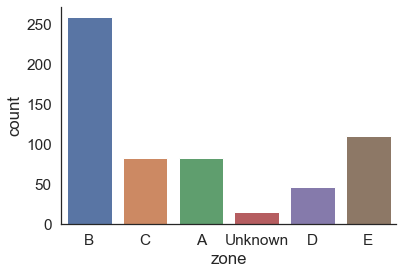

In [13]:
sns.countplot(data=hits_df, x= "zone")
sns.despine()
#plt.title("Bullet hit count by Airplane Zone")
#plt.xlabel("Bullet hits")

In [14]:
df["outline"] = np.where(df["zone"]== "OutsidePlane",0,1)
df

,x,y,bullet,zone,outline
0,0,0,0.0,OutsidePlane,0
1,0,1,0.0,OutsidePlane,0
2,0,2,0.0,OutsidePlane,0
3,0,3,0.0,OutsidePlane,0
4,0,4,0.0,OutsidePlane,0
...,...,...,...,...,...
87495,249,345,0.0,OutsidePlane,0
87496,249,346,0.0,OutsidePlane,0
87497,249,347,0.0,OutsidePlane,0
87498,249,348,0.0,OutsidePlane,0


In [15]:
df.pivot("x","y","outline")

y,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
x,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(0.0, 350.0, 250.0, 0.0)

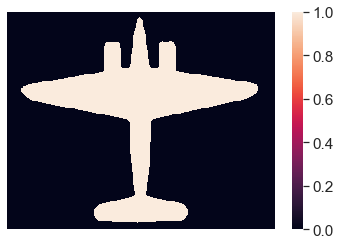

In [16]:
ax = sns.heatmap(data=df.pivot("x","y","outline"))
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.axis('off')

(0.0, 350.0, 250.0, 0.0)

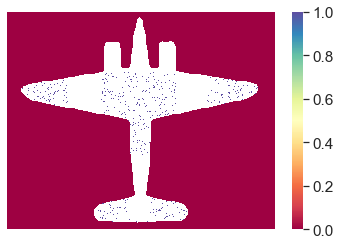

In [17]:
ax = sns.heatmap(data=df.pivot("x","y","bullet"),
                 cmap="Spectral")
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.axis('off')